# General demo

In [1]:
import pandas as pd
import numpy as np
from numpy import random

In [2]:
from insilico import *

Define a function for the experiment

In [3]:
def experiment_f(mean, sigma, seed):
    # All seeds should be initialized using a parameter for reproducibility
    random.seed(seed)
    # Return a dict with the results (must be pickleable)
    return {"value": random.normal(mean, sigma)}

Define the values for each of the parameters

In [4]:
experiment = Experiment(
    [
        ("mean", [1,2,4]),
        ("sigma", [1,2,3]),
        ("seed", list(range(20))),
    ],
    experiment_f, # Funcion
    "experiment-demo", # Folder to save the results
)

In [5]:
# If the definition of the experiment has changed, previous results can be deleted by running:
experiment.invalidate()

In [6]:
experiment.run_all()

In [7]:
df=experiment.get_results_df()
df

value
mean sigma seed          
1    1     0     2.764052
           1     2.624345
           2     0.583242
           3     2.788628
           4     1.050562
...                   ...
4    3     15    3.063015
           16    4.383846
           17    4.828798
           18    4.238285
           19    4.663010

[180 rows x 1 columns]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

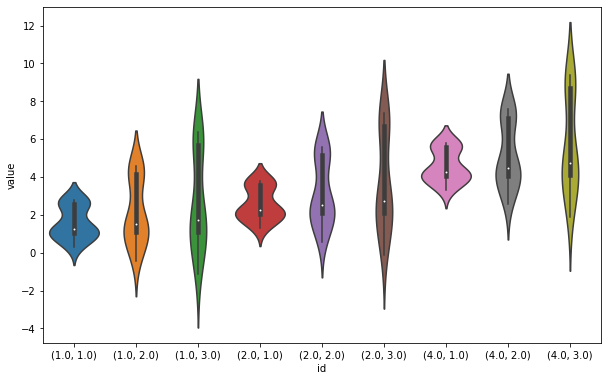

In [9]:
# Add an id field concatenating the two relevant levels of the index:
df["id"]=df.reset_index(["mean", "sigma"]).apply(lambda x: "(%s, %s)"%(x["mean"],x["sigma"]), axis=1).values

plt.figure(figsize=(10, 10 / 1.618))
sns.violinplot(
    data=df,
    x="id",
    y="value",
)
# plt.ylim(0.8, 1.1)
plt.show()